# Design of Visualizations

Visualizations are bad when they *hide*, *distract*, or *mislead*.

### Types of Data

Before building a visualization, it is important to know the type of data you are dealing with.

##### Qualitative vs Quantitative

* Qualitative/Categorical
    * Nominal
        * No inherent order to data
        * Examples: Gender, marital status, zip code, breakfast items, emotions, etc.
    * Ordinal
        * Intrinsic order or ranking but no well-defined magnitude of difference between each value
        * Examples: Letter grade, podium ranking, survey ratings, etc.
* Quantitative/Numeric
    * Interval
        * Numeric values where absolute differences between values are meaningful (i.e., can add and subtract)
    * Ratio
        * Numeric values where relative differences between values are meaningful (i.e., can multiply & divide)

Quantitative variables can also be divided into *discrete* and *continuous*.

##### Quantitative - Discrete vs Continuous

* Discrete
    * Quantitative variables can only take on a specific set of values at some maximum level of precision (e.g., integers)
    * Examples: Pages in a book, trees in a yard, dogs at a coffee shop
* Continuous
    * Quantitative variables can (hypothetically) take on values to any level of precision (e.g., real numbers)
    * Examples: Height, age, income

##### Likert Scale

Likert scale data may also be data you encounter. Technically, responses on these types of questions should be considered *ordinal*. However, it might not be the case that differences in consecutive levels are consistent in size. However, in order to simply analyses, Likert data is often treated as *interval* data.

<div align="center">
    <figure>
        <img src="./images/likertscale-1.png" width="400">
        <figcaption><em>This Likert scale, which happens to be graphical, has five points, allowing for neutrality (source: <a href="https://www.surveygizmo.com/survey-blog/likert-scale-what-is-it-how-to-analyze-it-and-when-to-use-it/">surveygizmo</em></a>)
        </figcaption>
    </figure>
</div>
<div align="center">
    <figure>
        <img src="./images/6-point-likert-scale-even-survey.png" width="400">
        <figcaption><em>This Likert scale has six points, not allowing for neutrality (source: <a href="https://www.fieldboom.com/blog/likert-scale/">fieldboom</em></a>)
        </figcaption>
    </figure>
<div align="center"></div>

### Display Elements

There are a number of ways to change the way in which data is displayed including where and how it is displayed with or on the
* x- and y-axis,
* size,
* shape,
* texture,
* angle, and
* length.

In general, humans are able to best understand data encoded with **positional changes** (differences in x- and y- position as we see with scatterplots) and **length changes** (differences in box heights as we see with bar charts and histograms).

Alternatively, humans *struggle* with understanding data encoded with **color hue changes** (as are unfortunately commonly used as an additional variable encoding in scatter plots - we'll study this in upcoming concepts) and **area** or **area changes** (as we see in pie charts, which often makes them not the best plot choice).

Color should only be used to draw attention to a key finding.

### Chart Junk

Charts should include the minimum number of elements such that it communicates your message effectively. Anything above this minimum is considered *[chart junk](https://en.wikipedia.org/wiki/Chartjunk)*.

Examples include:
* Heavy grid lines
* Unnecessary text
* Pictures surrounding the visual
* Shading or 3d components
* Ornamented chart axes

##### Data-Ink Ratio

The data-to-ink ratio was developed by Edward Tufte in 1983 and is defined as

$${\frac{\text{amount of ink used to describe the data}}{\text{amount of ink used to scribe everything else}}.}$$

In general, the higher the data-ink ratio the better.


### Polishing Plots - Explanatory Visualizations

* Choose an appropriate plot
    * The choice will depend on the number of variables and their types (i.e., categorical/qualitative - nominal or ordinal, numeric/quantitative - discrete or continuous).
* Choose appropriate encodings
    * With three numeric variables, you should consider plotting your dependent variable on either the y-axis or with a non-positional encoding (e.g., color).
* Pay attention to design integrity
    * Minimize chart junk
    * Maximize data-ink ratio
    * Avoid the same color schemes for different variables, especially if they will be used later within the same presentation
* Label your axes & choose appropriate tick marks
    * Provide a good axes' titles and include units (e.g., "Height (cm)" vs "Height")
    * Provide at least three tick marks on each axis
    * Consider using abbreviations for very small or large number labels (e.g., "250K" vs "250000")
* Provide legends for non-positional variables
    * Ensure your encoding meanings are communicated in a legend
* Title your plot and include descriptive comments
    * Create a title that aims to draw a viewer's attention to the main points
    * Include comments to provide valuable context or reinforce your message and main points

##### `matplotlib` polishing

In `matplotlib`, each visualization is based on a single **Figure** which contains one or more **Axes**. Each **Axes** houses elements like *points*, *lines*, and *boxes* that depict the plotted data.

* `figure` (Figure-level)
    * Used to create a figure, most often using the `figsize` parameter to set the figure dimensions.
* `xlabel` and `ylabel` (Axes-level)
    * Used for setting axis labels
* `xticks` and `yticks` (Axes)
    * Used for setting tick marks
* `legend` (Axes)
    * Used to create and customize a legend
    * The `title` parameter allows you to label what feature is bing depicted in the legend
    * `loc` and `ncol` parameters allow you to move and shape the legend if it is placed in an awkward location by default
* `colorbar` (Axes)
    * Used to add a colorbar to a plot
    * Use the `label` parameter to set the label
* `title` (Axes)
    * Set axis titles
* `suptitle` (Figure)
    * Sets a title for the entire figure as a whole
    * If faceting or subplotting, `suptitle` will set the title for the entire figure while `title` only sets the title for a single Axes

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
pokemon = pd.read_csv('./data/pokemon.csv')

# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

##### Non-polished Plot

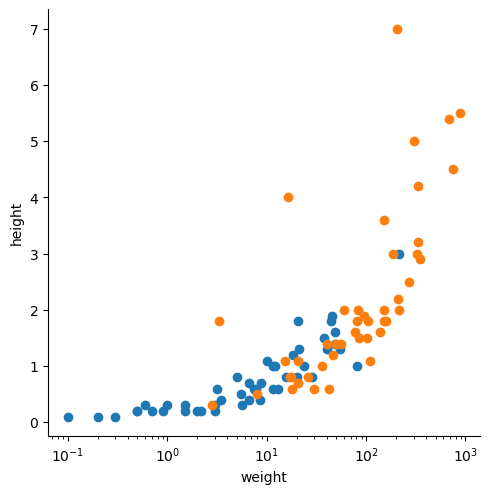

In [18]:
g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log');

##### Polished Plot

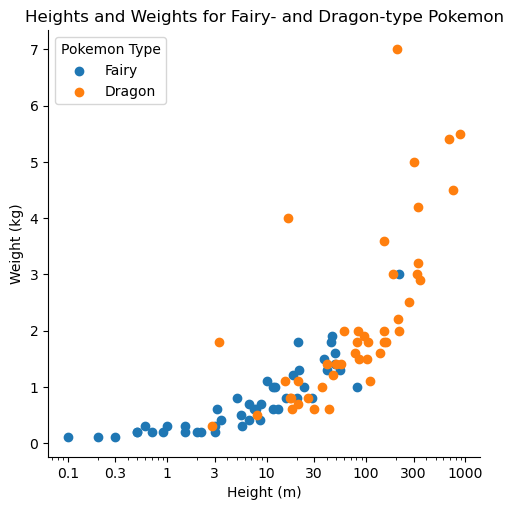

In [19]:
g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')
plt.legend(['Fairy', 'Dragon'], title='Pokemon Type')
xticks=[.1, .3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(xticks, xticks)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon');